In [161]:
import cv2
import glob
from google.colab.patches import cv2_imshow

In [12]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

In [105]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pdb
from tensorflow import keras 
# from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, BatchNormalization, Dropout, Input, MaxPool2D , Flatten
import cv2
import imgaug.augmenters as iaa
from PIL import Image, ImageDraw
from PIL import ImagePath
from tensorflow.keras.models import Model, load_model
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler
import random
from tqdm import tqdm
from sklearn.metrics import roc_curve,precision_recall_curve, auc , multilabel_confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0 , EfficientNetB4 , EfficientNetB7
import tensorflow as tf
from tensorflow.keras.utils import to_categorical ,Sequence
#import segmentation_models as sm


In [3]:
#https://www.kaggle.com/code/volkandl/segmenator-unet-in-steel
#https://medium.com/analytics-vidhya/severstal-steel-defect-detection-2d2e836855c2#:~:text=The%20segment%20for%20each%20defect,defect%20locations%20on%20an%20image.&text=Where%20X%20is%20the%20predicted,X%20and%20Y%20are%20empty.
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [4]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,te;q=0.7" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1670132455&Signature=STa52UeBxDKYstFUaFU4v9jva5c94sUhSuhSYddpPajpcN475%2FrC18m%2FNZtLnqySJ3tu4KaluWj0HSJpP1DDKsd5L4msXDwlI9pXah1tqOXADf58D1HbKG5ThygIbfQwse5aFQWG7UcFWUQUEp19x3psn43dX3pIshTxOGSM4Sex28RUhcowZDWl09bT3pJJUtzOASqBgQxHy5%2BlDr26HKOHfNOhZsOg48G%2BeKHxLOF%2BSKEz6HJaWhEi1mj7IMGQB%2F6RmqrGnuC%2FLZyiKn8ynz851gydJMqWT5TsovWS5%2BMu808coxZ%2F1qtRe7P%2Bb5G4YEqcnIj%2BfkV3YNhyezwDHA%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip" -L -o "severstal-steel-defect-detection.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1606M  100 1606M    0     0   132M      0  0:00:12  0:00:12 --:--:--  151M


In [5]:
!unzip '/content/severstal-steel-defect-detection.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

In [7]:
!unzip '/content/train_numpy_mask.zip'

Streaming output truncated to the last 5000 lines.
  inflating: content/train_numpy_mask/64945c8c0.npy  
  inflating: content/train_numpy_mask/9c81f6e2e.npy  
  inflating: content/train_numpy_mask/cf86d1632.npy  
  inflating: content/train_numpy_mask/ab2541958.npy  
  inflating: content/train_numpy_mask/7158531d8.npy  
  inflating: content/train_numpy_mask/32a201cd2.npy  
  inflating: content/train_numpy_mask/08de8621d.npy  
  inflating: content/train_numpy_mask/87f2a67af.npy  
  inflating: content/train_numpy_mask/7a2908c51.npy  
  inflating: content/train_numpy_mask/77e5c398e.npy  
  inflating: content/train_numpy_mask/ac4ba5c1a.npy  
  inflating: content/train_numpy_mask/44ada0c0b.npy  
  inflating: content/train_numpy_mask/419dc2472.npy  
  inflating: content/train_numpy_mask/2f3277628.npy  
  inflating: content/train_numpy_mask/d127abcc8.npy  
  inflating: content/train_numpy_mask/2feb3983d.npy  
  inflating: content/train_numpy_mask/4157934a2.npy  
  inflating: content/train_nump

In [6]:
!unzip '/content/test_numpy_mask.zip'

Archive:  /content/test_numpy_mask.zip
   creating: content/test_numpy_mask/
  inflating: content/test_numpy_mask/c7755caf9.npy  
  inflating: content/test_numpy_mask/7ee5a339e.npy  
  inflating: content/test_numpy_mask/e67ffcc83.npy  
  inflating: content/test_numpy_mask/f5c8f7766.npy  
  inflating: content/test_numpy_mask/79adc3616.npy  
  inflating: content/test_numpy_mask/1988d45c4.npy  
  inflating: content/test_numpy_mask/deca512a1.npy  
  inflating: content/test_numpy_mask/ec52fac2d.npy  
  inflating: content/test_numpy_mask/eb10d7ae4.npy  
  inflating: content/test_numpy_mask/735a876fb.npy  
  inflating: content/test_numpy_mask/7611175e3.npy  
  inflating: content/test_numpy_mask/3a7eee423.npy  
  inflating: content/test_numpy_mask/c515ddabf.npy  
  inflating: content/test_numpy_mask/2e8787425.npy  
  inflating: content/test_numpy_mask/051f0d825.npy  
  inflating: content/test_numpy_mask/db62a970a.npy  
  inflating: content/test_numpy_mask/042691991.npy  
  inflating: content/t

In [229]:

train_images_path = '/content/train_images'
#train_masks_path = '/content/train_masks'
train_image_names = os.listdir(train_images_path)
train_masks_npy_path = '/content/content/train_numpy_mask'
train_df = pd.read_csv('/content/train.csv') 

In [230]:
len(train_image_names)

12568

In [231]:
#https://www.geeksforgeeks.org/merge-two-dataframes-with-same-column-names/
train_image_names = pd.DataFrame(train_image_names,
                                              columns =['ImageId'])
print('After merging:')
#train_df=pd.concat([train_df,train_image_names], axis=0)
train_df = pd.merge(train_df,train_image_names,how = 'outer',on = ['ImageId','ImageId'])
train_df = train_df.fillna(' ')
train_df.head(5)

After merging:


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1.0,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3.0,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1.0,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4.0,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3.0,229501 11 229741 33 229981 55 230221 77 230468...


In [232]:
train_df

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1.0,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3.0,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1.0,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4.0,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3.0,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
12992,bbd5080f6.jpg,,
12993,9172281a1.jpg,,
12994,a2554a434.jpg,,
12995,35d245aa8.jpg,,


A total of 12997 images are present in train data in which input data consists of imageid and Encoded pixels

In [ ]:
#train_df['mask'] = train_df.apply(lambda row: enc2mask(enc=row.EncodedPixels,fill_value=row.ClassId),axis=1)
#print(train_df)

In [13]:
train_df['ImageId'].iloc[3]

'000f6bf48.jpg'

In [14]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
train_data = pd.pivot_table(train_df, values='EncodedPixels', index='ImageId',columns='ClassId', aggfunc=np.sum,fill_value= ' ').astype(str)
del train_data[' ']
train_data = train_data.reset_index()
train_data.columns = ['ImageId','Defect_1','Defect_2','Defect_3','Defect_4']
train_data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


In [16]:
# 'hasDefect' column indicates if there is atleast one defect in the image
#https://www.kaggle.com/code/volkandl/segmenator-unet-in-steel
insert_column = []
for i in range(len(train_data)):
    if (train_data['Defect_1'][i]== ' ' and train_data['Defect_2'][i]== ' ' and train_data['Defect_3'][i]==' ' and train_data['Defect_4'][i]==' '):
        insert_column.append(0)
    else:
        insert_column.append(1)
train_data['hasDefect'] = insert_column

# 'hasDefect_1' column indicates if there is type 1 defect in the image
insert_column = []
for i in range(len(train_data)):
    if train_data['Defect_1'][i]==' ':
        insert_column.append(0)
    else:
        insert_column.append(1)
train_data['hasDefect_1'] = insert_column

# 'hasDefect_2' column indicates if there is type 2 defect in the image
insert_column = []
for i in range(len(train_data)):
    if train_data['Defect_2'][i]==' ':
        insert_column.append(0)
    else:
        insert_column.append(1)
train_data['hasDefect_2'] = insert_column

# 'hasDefect_3' column indicates if there is type 3 defect in the image
insert_column = []
for i in range(len(train_data)):
    if train_data['Defect_3'][i]==' ':
        insert_column.append(0)
    else:
        insert_column.append(1)
train_data['hasDefect_3'] = insert_column

# 'hasDefect_4' column indicates if there is type 4 defect in the image
insert_column = []
for i in range(len(train_data)):
    if train_data['Defect_4'][i]==' ':
        insert_column.append(0)
    else:
        insert_column.append(1)
train_data['hasDefect_4'] = insert_column

train_data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,hasDefect,hasDefect_1,hasDefect_2,hasDefect_3,hasDefect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,0,0,0
1,00031f466.jpg,,,,,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,0,0,1,0


In [17]:
# 'hasDefect' column indicates if there is atleast one defect in the image
## 'hasDefect' column indicates if there is atleast one defect in the image
#https://www.kaggle.com/code/volkandl/segmenator-unet-in-steel
hasDefect_column,hasDefect_column1,hasDefect_column2,hasDefect_column3,hasDefect_column4 = [],[],[],[],[]

for i in range(len(train_data)):
    if (train_data['Defect_1'][i]== train_data['Defect_2'][i]== train_data['Defect_3'][i]==train_data['Defect_4'][i]==' '):
      hasDefect_column.append(0)
    else:
      hasDefect_column.append(1)

    if train_data['Defect_1'][i]==' ':
        hasDefect_column1.append(0)
    else:
        hasDefect_column1.append(1) 

    if train_data['Defect_2'][i]==' ':
        hasDefect_column2.append(0)
    else:
        hasDefect_column2.append(1) 

    if train_data['Defect_3'][i]==' ':
        hasDefect_column3.append(0)
    else:
        hasDefect_column3.append(1)  

    if train_data['Defect_4'][i]==' ':
        hasDefect_column4.append(0)
    else:
        hasDefect_column4.append(1)

train_data['hasDefect'],train_data['hasDefect_1'],train_data['hasDefect_2'],train_data['hasDefect_3'],train_data['hasDefect_4'] = hasDefect_column,hasDefect_column1,hasDefect_column2,hasDefect_column3,hasDefect_column4       

train_data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,hasDefect,hasDefect_1,hasDefect_2,hasDefect_3,hasDefect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,0,0,0
1,00031f466.jpg,,,,,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,0,0,1,0


In [18]:
# Images with defect 1 , 2 , 3 , 4
## 'hasDefect' column indicates if there is atleast one defect in the image
#https://www.kaggle.com/code/volkandl/segmenator-unet-in-steel
print('There are {} images with defect 1'.format(sum(train_data['hasDefect_1'])))
print('There are {} images with defect 2'.format(sum(train_data['hasDefect_2'])))
print('There are {} images with defect 3'.format(sum(train_data['hasDefect_3'])))
print('There are {} images with defect 4'.format(sum(train_data['hasDefect_4'])))

There are 897 images with defect 1
There are 247 images with defect 2
There are 5150 images with defect 3
There are 801 images with defect 4


In [19]:
## 'hasDefect' column indicates if there is atleast one defect in the image
#https://www.kaggle.com/code/volkandl/segmenator-unet-in-steel
insert_column = []
for i in range(len(train_data)):
    if train_data['hasDefect_2'].iloc[i]==1:
        insert_column.append(2)
    elif train_data['hasDefect_4'].iloc[i]==1:
        insert_column.append(4)
    elif train_data['hasDefect_1'].iloc[i]==1:
        insert_column.append(1)
    elif train_data['hasDefect_3'].iloc[i]==1:
        insert_column.append(3)
    else:
        insert_column.append(0)
train_data['minority_preference']= insert_column
train_data.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,hasDefect,hasDefect_1,hasDefect_2,hasDefect_3,hasDefect_4,minority_preference
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,0,0,1,0,3


In [20]:
#Train Test validation split 
from sklearn.model_selection import train_test_split
X = train_data.copy()
X_train, X_test = train_test_split(X, test_size = 0.2, stratify = X['minority_preference'],random_state=15)
print(X_train.shape, X_test.shape)

(10054, 11) (2514, 11)


In [66]:
np.array(X_train.hasDefect.value_counts())

array([5333, 4721])

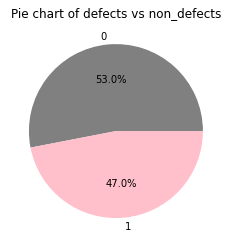

In [83]:
#https://www.w3schools.com/python/matplotlib_pie_charts.asp
import matplotlib.pyplot as plt
import numpy as np

y = np.array(X_train.hasDefect.value_counts())
mylabels = ["0", "1"]
mycolors = ["gray", "pink"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%',colors = mycolors)
plt.title("Pie chart of defects vs non_defects")
plt.show() 

From the above plot 47  % of items are non_defective and 53.04 % of items are defective

Freom % of distributions we can easily say that there is no class imbalance

# Distribution of type of defect

<ipython-input-85-53b444120db7>:19: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



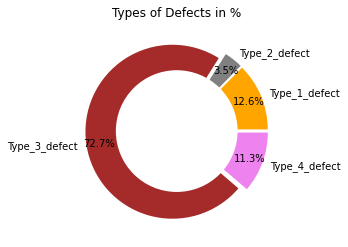

In [85]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
#
import matplotlib.pyplot as plt

# Setting labels for items in Chart
Defects = ['Type_1_defect','Type_2_defect','Type_3_defect','Type_4_defect']

# Setting size in Chart based on
# given values
per_of_defects = [X_train[['hasDefect_1']].sum(axis = 0),X_train[['hasDefect_2']].sum(axis = 0),X_train[['hasDefect_3']].sum(axis = 0),X_train[['hasDefect_4']].sum(axis = 0)]

# colors
colors = ['Orange', 'Gray', 'Brown',
		'Violet']
# explosion
explode = (0.05, 0.05,0.05,0.05)

# Pie Chart
plt.pie(per_of_defects, colors=colors, labels=Defects,
		autopct='%1.1f%%', pctdistance=0.85,
		explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Types of Defects in %')

# Displaying Chart
plt.show()


From The above pie outer circle chart Defect wise expressed in % of each defective class.

From the plot Type_3 defective has highest contribution
and least from Type_2 defect.hence this problem belongs to a multi classification problem.

#RLE

#https://www.kaggle.com/competitions/sartorius-cell-instance-segmentation/discussion/278936#1546292


An intuitive explanation from @cdeotte

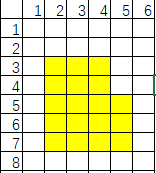QQ20190801163949

Expressing the pixels above (yellow):

There are 48 pixels. The top left is numbered 1 then you go down that column until you hit number 8. The top of the next column starts number 9, then down to 16, etc.

If walk the pixels from 1 to 48, a line of yellow begins at pixel 11 for length 5, then another begins at 19 for length 5, then another begins at 27 for length 5 and the last begins at 37 for length 3.

So the RLE is "11 5 19 5 27 5 37 3".

In [86]:
X_train

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,hasDefect,hasDefect_1,hasDefect_2,hasDefect_3,hasDefect_4,minority_preference
5655,720e3f026.jpg,,,300310 2 300564 6 300588 13 300673 2 300818 8 ...,,1,0,0,1,0,3
10784,daf2897e4.jpg,,,251639 10 251877 28 252115 46 252352 65 252590...,,1,0,0,1,0,3
3960,506826fc6.jpg,,,224769 5333 230145 128 230401 43 293635 11 293...,,1,0,0,1,0,3
10763,da57134fa.jpg,,,,,0,0,0,0,0,0
1777,237a50f6f.jpg,,,,,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7744,9dbb7b85c.jpg,,,186101 7 186334 30 186567 54 186799 78 187032 ...,,1,0,0,1,0,3
8289,a86d2a653.jpg,,,,,0,0,0,0,0,0
3593,48c05765d.jpg,,,,,0,0,0,0,0,0
10319,d169e1b81.jpg,,,,13563 2 13816 5 14069 8 14322 11 14575 14 1482...,1,0,0,0,1,4


# masking

In [90]:
def rle2_1frame(mask_rle_list, shape=(1600,256)):
    '''
    mask_rle: list of strings(run-length as string formated (start length)), each for 1,2,3,4 defects 
    shape: (width,height) of array to return 
    Returns 2 D numpy array. 0 for no defect, 1 defect 1 , 2 for defect 2 , 3 for defect 3 and 4 for defect 4
    This function is specific to this competition
    '''
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)    
    for i in range(len(mask_rle_list)):
      if mask_rle_list[i] != ' ' :
        sp = mask_rle_list[i].split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (sp[0:][::2], sp[1:][::2])]
        starts -= 1
        ends = starts + lengths
        # pdb.set_trace()
        for lo, hi in zip(starts, ends):
            img[lo:hi] = i+1 
    img = img.reshape(shape).T      
    return img #256 * 1600

In [91]:
#https://www.kaggle.com/code/allanyiin/steeldefect
palette = [[0, 0, 0], [255, 105, 180], [ 180,255,105],[ 105, 180,255], [255, 255,105]]

def enc2mask(enc, shape=(1600,256),fill_value=0):
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    s = enc.split()
    for i in range(len(s)//2):
        start = int(s[2*i]) - 1
        length = int(s[2*i+1])
        img[start:start+length] = int(fill_value)
    return img.reshape(shape).T


def mask2enc(mask, n=4):
    pixels = mask.T.flatten()
    encs = []
    for i in range(1,n+1):
        p = (pixels == i).astype(np.int8)
        if p.sum() == 0: encs.append('')
        else:
            p = np.concatenate([[0], p, [0]])
            runs = np.where(p[1:] != p[:-1])[0] + 1
            runs[1::2] -= runs[::2]
            encs.append(' '.join(str(x) for x in runs))
    return encs


def label2color(label_mask,palette):
    num_classes = len(palette)

    color_label= np.zeros((*label_mask.shape,3)).astype(np.int64)
    for i in range(num_classes):
        color_label[label_mask==i]=palette[i]
    return color_label

In [ ]:
#train_df['mask'] = train_df.apply(lambda row: enc2mask(enc=row.EncodedPixels,fill_value=row.ClassId),axis=1)
#print(train_df)

In [209]:
colourmap = [[0, 0, 0], [200, 105, 150], [ 180,255,105],[ 105, 180,255], [255, 255,105]]
classes_tocolour =   dict({0: [0, 0, 0], 1: [255, 105, 180], 2:  [180,255,105], 3:[105, 180,255], 4: [ 255, 255,105]})
classes = [0,1,2,3,4]  

In [166]:
# We need a function to convert EncodedPixels into mask
# https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode

def rle2_1frame(mask_rle_list, shape=(1600,256)):
    '''
    mask_rle: list of strings(run-length as string formated (start length)), each for 1,2,3,4 defects 
    shape: (width,height) of array to return 
    Returns 2 D numpy array. 0 for no defect, 1 defect 1 , 2 for defect 2 , 3 for defect 3 and 4 for defect 4
    This function is specific to this competition
    '''
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)    
    for i in range(len(mask_rle_list)):
      if mask_rle_list[i] != ' ' :
        sp = mask_rle_list[i].split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (sp[0:][::2], sp[1:][::2])]
        starts -= 1
        ends = starts + lengths
        # pdb.set_trace()
        for lo, hi in zip(starts, ends):
            img[lo:hi] = i+1 
    img = img.reshape(shape).T      
    return img #256 * 1600

In [167]:
def rle_to_RGBmask(mask_rle_list, classes_tocolour ,shape=(1600,256)):
  ''' 
  This function will save the RGB masks from RLE
  '''
  img = rle2_1frame(mask_rle_list, shape=(1600,256))
  # pdb.set_trace()
  #Till here we got 256 X 1600 and now we have to convert this matrix to an RGB encoded mask
  RGB_image = []
  for outer in img :
    col = []
    for inner in outer :
      col.append(classes_tocolour.get(inner))  
    RGB_image.append(col)
  return np.array(RGB_image) #256 X 1600 X 3 

In [168]:
def RGBmask_to_width_height_classes ( rgb_mask , colourmap ):
  ''' 
  This function will convert the RGB mask to width X height X classes
  '''
  output_mask = []
  for i , color in enumerate(colourmap): 
    cmap = np.all(np.equal(rgb_mask , color ), axis = -1)
    cmap.astype(int)  
    output_mask.append(cmap)
  output_mask = np.stack(output_mask , axis = -1)
  output_mask = output_mask.astype(np.uint8)
  return output_mask #output will have five channels. any pixel will have 1 in any one of the 5 channels 

In [169]:
def width_height_classes_toRGB(img,classes_tocolour):
  ''' Given an widthXheightXclasses we need to convert into an RGB image 256X1600X5  to 256 X 1600 X 3'''
  img = np.argmax(img,axis= -1) #256 X 1600
  RGB_image = []
  for outer in img :
    col = []
    for inner in outer :
      col.append(classes_tocolour.get(inner))  
    RGB_image.append(col)
  return np.array(RGB_image) #256 X 1600 X 3 

In [170]:
def one_frame_rgb(img,classes_tocolour):
  RGB_image = []
  for outer in img :
    col = []
    for inner in outer :
      col.append(classes_tocolour.get(inner))  
    RGB_image.append(col)
  return np.array(RGB_image) #256 X 1600 X 3 

In [98]:
def width_height_classes_toRGB(img,classes_tocolour):
  ''' Given an widthXheightXclasses we need to convert into an RGB image 256X1600X5  to 256 X 1600 X 3'''
  img = np.argmax(img,axis= -1) #256 X 1600
  RGB_image = []
  for outer in img :
    col = []
    for inner in outer :
      col.append(classes_tocolour.get(inner))  
    RGB_image.append(col)
  return np.array(RGB_image) #256 X 1600 X 3 

Masking should done for image segmentation by using Run length encoding technique and coloring the custom labels was also done 

In [234]:
#below code is used for saving the masked images
#%pylab
#from tqdm import tqdm
#import cv2
#from numpy import save
# # saving the widthXheightXchannels for all the train images
#test_numpy_masks = []
#test_masks_npy_path="/content/test_numpy_mask"
#for index, row in tqdm(X_test.iterrows()):
#  mask_rle_list = [row.Defect_1,row.Defect_2,row.Defect_3,row.Defect_4] 
#  rgb_mask = rle_to_RGBmask(mask_rle_list, classes_tocolour, shape=(1600, 256))
#  image_mask = RGBmask_to_width_height_classes(rgb_mask, colourmap)  #256 X 1600 X 5 
#  mask_name = row.ImageId.split('.')[0]
#  mask_name = mask_name + '.npy'
#  mask_name = os.path.join(test_masks_npy_path,mask_name)
#  test_numpy_masks.append(mask_name)
#   # save to npy file
 
  #print(mask_name)
  #save(str(mask_name),image_mask) 
  #os.remove(str(mask_name))
  #cv2.imwrite(mask_name, image_mask)
# test_numpy_masks = []
# for index, row in X_test.iterrows():
#   mask_rle_list = [row.Defect_1,row.Defect_2,row.Defect_3,row.Defect_4] 
#   rgb_mask = rle_to_RGBmask(mask_rle_list, classes_tocolour, shape=(1600, 256))
#   image_mask = RGBmask_to_width_height_classes(rgb_mask, colourmap)  #256 X 1600 X 5 
#   mask_name = row.ImageId.split('.')[0]
#   mask_name = mask_name + '.npy'
#   mask_name = os.path.join(train_masks_npy_path,mask_name)
#   test_numpy_masks.append(mask_name)
#   # save to npy file
#   save(mask_name,image_mask) 
# save('/content/drive/MyDrive/severstal-steel-defect-detection/train_numpy_masks.npy',np.array(train_numpy_masks))
# save('/content/drive/MyDrive/severstal-steel-defect-detection/test_numpy_masks.npy',np.array(test_numpy_masks))
# X_train['train_numpy_masks'] = train_numpy_masks
# X_test['test_numpy_masks'] = test_numpy_masks 

# Sample images with no defects

Sample images with no defects:
da57134fa
237a50f6f


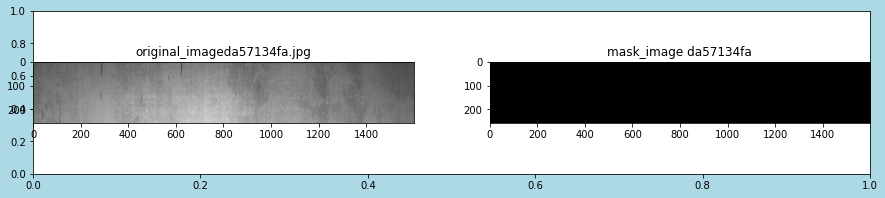

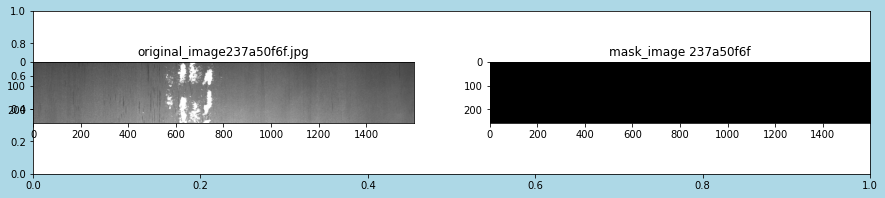

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("Sample images with no defects:")
for i in X_train['ImageId'][X_train['hasDefect']==0]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

From the above plot even image has shown some defect in original but the masked image plots no defective

# Sample images with defect_1

# Sample images with defect1
73afc8798
349be04dc


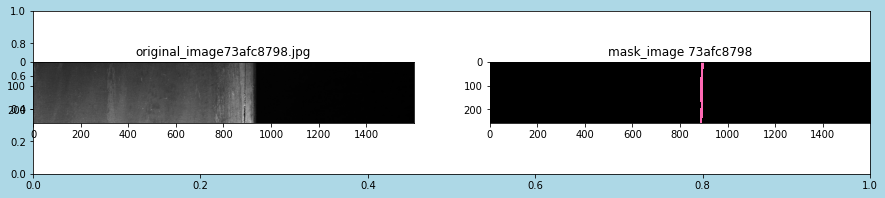

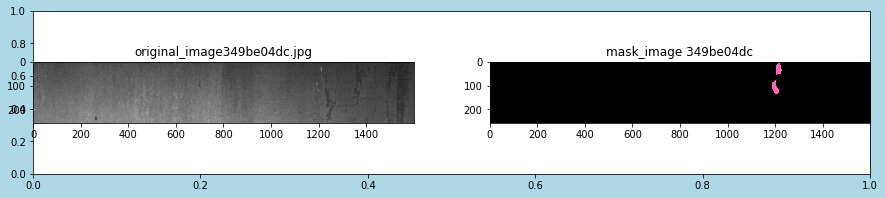

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("# Sample images with defect1")
for i in X_train['ImageId'][X_train['hasDefect_1']==1]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

# Sample images with defect2

# Sample images with defect2
62bf70fee
5238bc100


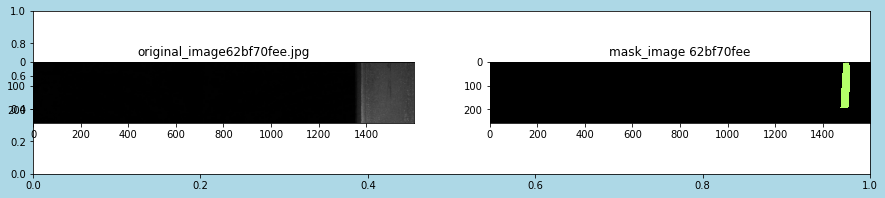

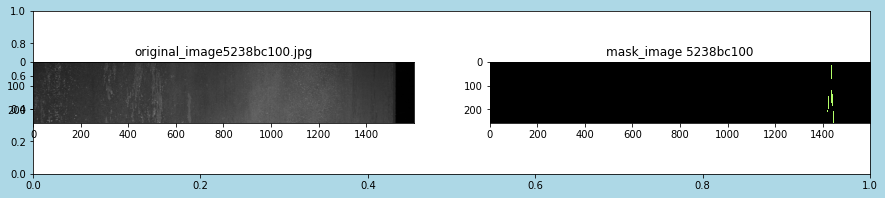

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("# Sample images with defect2")
for i in X_train['ImageId'][X_train['hasDefect_2']==1]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

# Sample images with defect3

# Sample images with defect3
720e3f026
daf2897e4


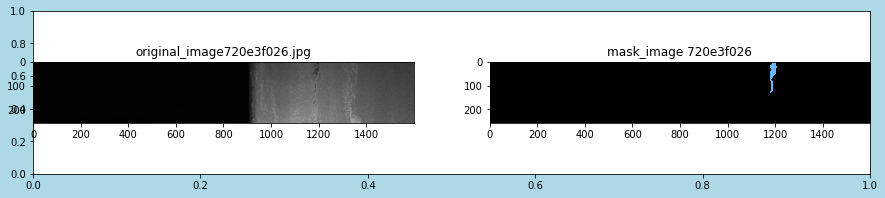

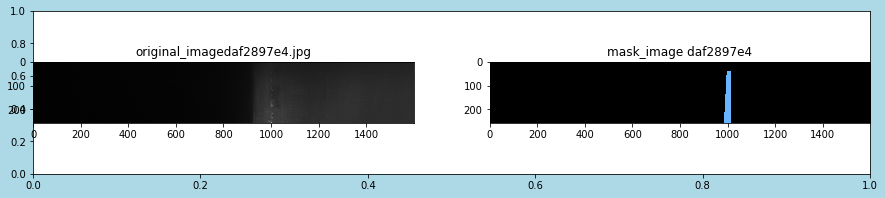

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("# Sample images with defect3")
for i in X_train['ImageId'][X_train['hasDefect_3']==1]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

# Sample images with defect4

Sample images with defect4:
feec56162
3f0b1c635


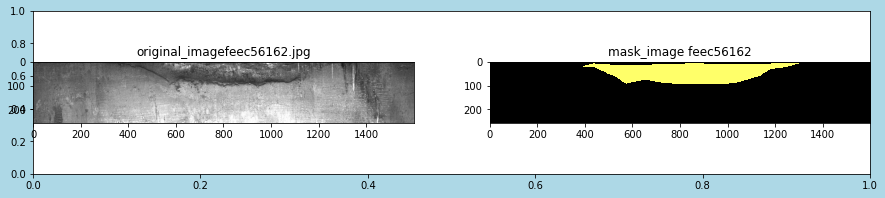

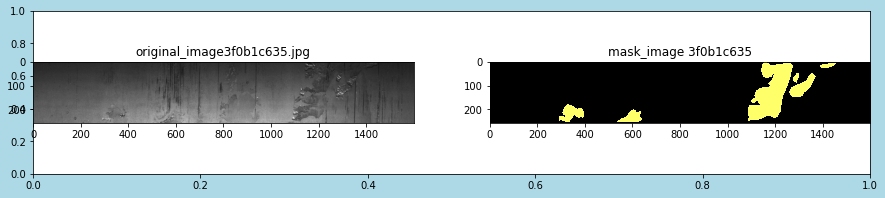

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("Sample images with defect4:")
for i in X_train['ImageId'][(X_train['hasDefect_1']==0) & (X_train['hasDefect_2']==0) &(X_train['hasDefect_3']==0) & (X_train['hasDefect_4']==1)]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

# Sample with multi defect images

Sample images with no defects:
1ffe887dd
b1b94f0fc


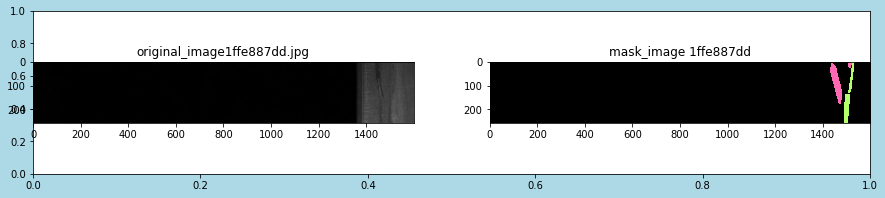

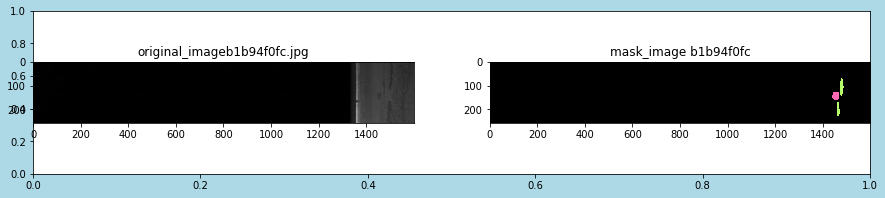

In [ ]:
# 5 images having no defects
#https://stackoverflow.com/questions/48694695/how-to-change-the-color-of-lines-within-a-subplot
#https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/
tmp = []
cnt=0
print("Sample images with no defects:")
for i in X_train['ImageId'][(X_train['hasDefect_1']==1) & (X_train['hasDefect_2']==1) &(X_train['hasDefect_3']==0) & (X_train['hasDefect_4']==0)]:
    if cnt<2:
        fig, ax = plt.subplots(1,1,figsize=(15, 3))
        fig.add_subplot(1, 2, 1)
    
        # img = Image.open(os.path.join(train_images_path,i))

        #original images
        img = cv2.imread(os.path.join(train_images_path , i))
        plt.imshow(img)
        
        plt.title("original_image"+str(i))
        #plt.show()
        i=i.split(".")[0]
        fig.add_subplot(1, 2, 2)
        print(i)
        #masked images
         # img = Image.open(os.path.join(train_images_path,i))
        original_mask = np.load("/content/content/train_numpy_mask/"+str(i)+'.npy') #256 X 1600X5
        original_mask = width_height_classes_toRGB(original_mask, classes_tocolour)
        plt.imshow(original_mask, interpolation='nearest')
        fig.set_facecolor("lightblue")
        plt.title(str('mask_image ' +i))
        

        cnt+=1

#Conclusions from EDA

A total of 12997 images are present in train data in which input data consists of imageid and Encoded pixels

There are 897 images with defect 1
There are 247 images with defect 2
There are 5150 images with defect 3
There are 801 images with defect 4

From the pie chart 47 % of items are non_defective and 53.04 % of items are defective

Freom % of distributions we can easily say that there is no class imbalance

From The above pie outer circle chart Defect wise expressed in % of each defective class.

From the plot Type_3 defective has highest contribution and least from Type_2 defect.hence this problem belongs to a multi classification problem.

Masking required for image segmentation by using Run length encoding technique on encoded pixels.

From the comparison of original image vs masked image it was noticed that  samples have a wide number of defects those are belong to defect_1_type,defect_2_type,defect_3_type,defect_4_type,no_defect_type,multi_defect_type

